# Lab 5 Linear Regression

In this part of the lab we will use linear regression to fit some data about housing prices in Boston.

In [1]:
# notebook magic to display plots
%matplotlib inline
# notebook magic to auto reload imported modules when changes are made to them 
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
boston = sklearn.datasets.load_boston()
print boston.keys()

['data', 'feature_names', 'DESCR', 'target']


To read a description of the dataset, uncomment the following line:

In [3]:
# print boston.DESCR

In [4]:
# Print column names
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The data (predictor variables) is stored as multi-dimensional array.  Let's convert this into a python pandas data frame for easier manipulation.

In [5]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The target variable (the y value we wish to predict) is stored separately.  In this case, the target variable is `MEDV` (the Median value of owner-occupied homes in \$1000’s).

In [6]:
price = boston.target  

## Exploratory Data Analysis and Summary Statistics
Let's explore this data set. First we use `describe()` to get basic summary statistics for each of the columns.


In [7]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Next let's look at some scatter plots to see the relationship between predictor variables and the target variable.  With a pandas data frame, you can access a column of data simply by using dot notation, like so:

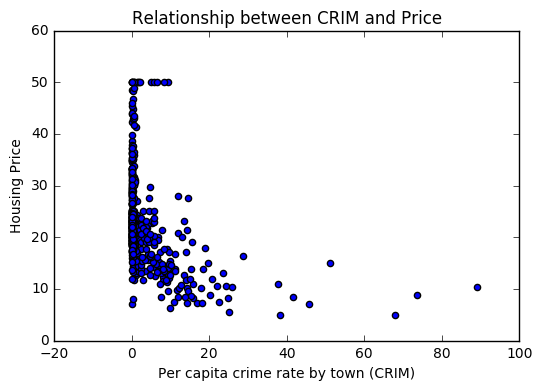

In [8]:
crime = bos.CRIM
plt.scatter(crime, price)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

**TODO:** Plot two more scatter plots: 'RM' vs. price and 'PTRATIO' vs. price.   Please write *descriptive* labels on the figures, such as above.  Note: this will require looking at the above documentation to see what 'RM' and 'PTRATIO' are!

In [9]:
# todo: your code here

## Linear Regression

Let's use sklearn to fit a linear regression model.  We'll start with a simple linear regression on 'RM'.  In other words, our model is: $price = \beta_0 + \beta_1 \times RM$.

We can select a subset of the columns of a data frame like this:

In [10]:
X = bos[['RM']]

Now let's fit a linear model using the sklearn module.

In [11]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

def getCoefficients(X, lm):
    """Given a dataset X and a fitted linear model, returns a nice data frame showing the coefficient.s"""
    names = ['Intercept'] + list(X.columns)
    coeffs = [lm.intercept_] + list(lm.coef_)
    return pd.DataFrame({'names': names, 'estimatedCoefficients': coeffs})

In [12]:
lm.fit(X, price)
getCoefficients(X, lm)

,estimatedCoefficients,names
0,-34.670621,Intercept
1,9.102109,RM


We can also get the $R^2$ goodness of fit:

In [13]:
# execute this line to get some documentation on what score gives you
lm.score?

In [14]:
lm.score(X, price)

0.48352545599133429

## Finding a good model

Your task is to find the best fitting model for this dataset.  You can accomplish this by writing some code that does this automatically (see p. 78 of the [ISL book](http://www-bcf.usc.edu/~gareth/ISL/)) or you can do it using a more manual approach

You can receive full credit if you implement the "Forward selection" approach described in the ISL book (p. 78). For a stopping criteria, you can simply add up to 5 predictor variables and then stop.  But you are encouraged to get creative (*challenge problem!*).  Here are things you might try:

- use exploratory data analysis to identify interesting patterns in the data that you can exploit
- try some of the other approaches described on p.78
- relax the additive assumption (p. 87 of ISL)
- consider non-linear relationships (p. 90)
- consider other data transformations (e.g., transform a numerical predictor into a categorial one then add the categorial predictor variable to your model, p. 82)

How will we judge if the model is good?  If we add more predictor variables, our $R^2$ can only go up, so it's not the best measure.  Instead we will split our dataset into two components:

In [15]:
bos, price = sklearn.utils.shuffle(bos, price, random_state=0)  # by shuffling bos and price together, we preserves the relationship
test_size = 250
trainBos = bos[:-test_size]
trainPrice = price[:-test_size]
testBos = bos[-test_size:]
testPrice = price[-test_size:]

Do *not* use the test data when building your model.  Instead, only use it at the end to evaluate your final model.  Here's an illustration of what that might look like:

In [16]:
# train a linear regression model with predictor variables RM and PTRATIO
columns = ['RM', 'PTRATIO']
X = trainBos[columns]
lm.fit(X, trainPrice)
print lm.score(X, trainPrice)
getCoefficients(X, lm)

0.519262756591


,estimatedCoefficients,names
0,-4.335293,Intercept
1,7.510121,RM
2,-1.122714,PTRATIO


In [17]:
# example of evaluating the model on the test data
Xtest = testBos[columns]
lm.score(Xtest, testPrice)

0.58822780340201819

**TODO** Go forth and build your model!  Write your code in `lab5.py`.  In the space below, evaluate your model on the test data:

In [18]:
# todo: evaluate your model on the test data

**TODO** Write a brief description of how you fit your model.

**YOUR ANSWER HERE**:  *todo: replace this with your answer*